# On-Center and Off-Center Ganglion Cells- Simple Receptor Field

In [194]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import math
import numpy as np
from numpy import asarray

## Import Image and Convert to Array

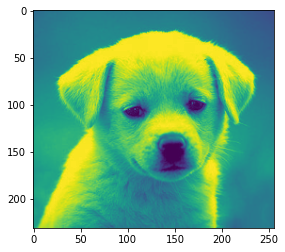

The shape of the image is: (231, 256)


In [218]:
im = Image.open(r"C:\Users\preet\Desktop\image_six.jpg")
im.thumbnail((256, 256))
im = im.convert("L")
jello = plt.imshow(im)
plt.show()

data = asarray(im)
print("The shape of the image is: " + str(data.shape))


## Create W receptor field

In [219]:
W = np.zeros((5,5)) + 100
W_1 = np.pad(W, ((2,2),(2,2)), mode='constant', constant_values = (-50,-50))
print(W_1)

[[-50. -50. -50. -50. -50. -50. -50. -50. -50.]
 [-50. -50. -50. -50. -50. -50. -50. -50. -50.]
 [-50. -50. 100. 100. 100. 100. 100. -50. -50.]
 [-50. -50. 100. 100. 100. 100. 100. -50. -50.]
 [-50. -50. 100. 100. 100. 100. 100. -50. -50.]
 [-50. -50. 100. 100. 100. 100. 100. -50. -50.]
 [-50. -50. 100. 100. 100. 100. 100. -50. -50.]
 [-50. -50. -50. -50. -50. -50. -50. -50. -50.]
 [-50. -50. -50. -50. -50. -50. -50. -50. -50.]]


In [214]:
W = np.zeros((5,5)) + -100
W_2 = np.pad(W, ((2,2),(2,2)), mode='constant', constant_values = (50,50))
print(W_2)

[[  50.   50.   50.   50.   50.   50.   50.   50.   50.]
 [  50.   50.   50.   50.   50.   50.   50.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50. -100. -100. -100. -100. -100.   50.   50.]
 [  50.   50.   50.   50.   50.   50.   50.   50.   50.]
 [  50.   50.   50.   50.   50.   50.   50.   50.   50.]]


## Perform One Step Convolution

In [215]:
(n_H_old, n_W_old) = data.shape

f = 9

n_H = int((n_H_old-f) + 1)
n_W = int((n_W_old-f)+ 1)

Z = np.zeros((n_H,n_W))

W = [W_1,W_2]

for h in range(n_H):
    vert_start = h
    vert_end = vert_start + f
    i = 0
    for w in range(n_W):
        horiz_start = w
        horiz_end = horiz_start + f
        slice_of_data = data[vert_start:vert_end, horiz_start:horiz_end]
        if i%2 == 0:
            s = slice_of_data * W_1
            number = np.sum(s)/81
        else:
            s = slice_of_data * W_2
            number = np.sum(s)/81
        i += 1
            
            
        Z[h][w] = number
            
print(Z.shape)





(217, 217)


In [216]:
print(Z)


[[-111.72839506  -16.04938272   91.35802469 ... -191.97530864
   185.80246914 -176.54320988]
 [-272.22222222  -61.11111111  285.80246914 ... -179.01234568
   170.98765432 -163.58024691]
 [-427.16049383  -57.40740741  405.55555556 ... -179.62962963
   173.45679012 -170.98765432]
 ...
 [-351.2345679   375.30864198  -81.48148148 ... -218.51851852
   228.39506173 -254.32098765]
 [-341.97530864  403.08641975 -200.61728395 ... -219.13580247
   231.48148148 -256.17283951]
 [-233.95061728  353.08641975 -304.32098765 ... -225.92592593
   238.27160494 -261.72839506]]


## Convert new array to image

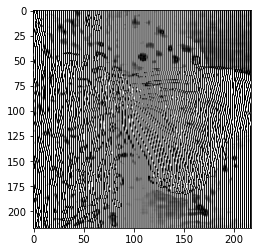

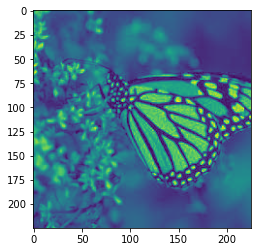

In [217]:
new  = Image.fromarray(Z)
jello = plt.imshow(new)
plt.show()

the  = Image.fromarray(data)
jello = plt.imshow(the)
plt.show()